In [1]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import time
import math
IOFOLDER='../../DGD_IO/'

In [2]:
def val(P,x):
    return P[0]+P[1]*x+P[2]*x*x
def grad(P,x):
    return P[1]+P[2]*2*x

In [3]:
def find(dsu,i):
    if dsu[i]==i:
        return i
    dsu[i]=find(dsu,dsu[i])
    return dsu[i]
def merge(dsu,i,j):
    dsu[find(dsu,i)]=find(dsu,j)
def connected(G):
    dsu=[i for i in range(len(G))]
    for i in range(len(G)):
        for j in G[i]:
            merge(dsu,i,j)
    for i in range(len(G)):
        if (find(dsu,i)!=find(dsu,0)):
            return (False,dsu)
    return (True,dsu)

In [15]:
listtonums=lambda A:str(list(A))[1:-1].replace(' ','')
PARSELIST=lambda s:list(map(float,s.split(',')))

In [169]:
#Pvals=['line']
Pvals=[i/20 for i in range(1,21)]
print('Pvals='+str(Pvals))
params=[[50,Pvals[(i-1)//100],i] for i in range(1,len(Pvals)*100+1)]
#params=[[50,Pvals[i-1],1] for i in range(1,len(Pvals)+1)]
fin=open(IOFOLDER+'input.txt','w')
for param in params:
    N,P,seed=param
    fin.write('N,P,seed={},{},{}\n'.format(N,P,seed))
    rnd.seed(seed)
    att=0
    while True:
        if P=='line':
            graph=[list(range(max(0,i-1),min(N,i+2))) for i in range(N)]
        else:
            graph=[[] for i in range(N)]
            for i in range(N):
                for j in range(i):
                    if rnd.random()<P:
                        graph[i].append(j)
                        graph[j].append(i)
                graph[i].append(i)
        info=connected(graph)
        att+=1
        if info[0]:
            break
    if seed%100==0:
        print(str(param)+'; # attempts='+str(att))

    #functions
    funcs=[]
    for i in range(N):
        a=rnd.uniform(0,1)
        v=rnd.uniform(-100,100)
        #(ax-v)^2=a^2x^2-2avx+v^2
        funcs.append(np.array([v*v,-2*a*v,a*a]))
    tfunc=np.array([0.0 for i in range(3)])
    for func in funcs:
        tfunc+=func
    tfunc/=N
    optx=-tfunc[1]/(2*tfunc[2])
    optval=val(tfunc,optx)
    #print(str(optx)+','+str(optval))
    locs0=[rnd.uniform(-200,200) for i in range(N)]
    #print('mean starting loc='+str(np.mean(locs0)))
    
    for i in range(N):
        fin.write(str(i)+':'+listtonums(graph[i])+'\n')
    for i in range(N):
        fin.write(str(i)+':'+listtonums(funcs[i])+'\n')
    fin.write(listtonums(locs0)+'\n')

    #graph network visualization
    '''groups=[[] for i in range(N)]
    for i in range(N):
        groups[find(info[1],i)].append(i)
    seq=[]
    for g in groups:
        seq.extend(g)
    locs=[[] for i in range(N)]
    for i in range(N):
        t=2*math.pi*i/N
        locs[seq[i]]=[math.cos(t),math.sin(t)]
    plt.figure()
    amt=0
    for g in groups:
        if len(g)>0:
            amt+=1
    tmp=0
    for g in groups:
        if len(g)>0:
            col=(1-tmp/amt,0,tmp/amt)
            for i in g:
                for j in graph[i]:
                    plt.plot([locs[i][0],locs[j][0]],[locs[i][1],locs[j][1]],linewidth=1,c=col)
            plt.scatter(x=[locs[i][0] for i in g],y=[locs[i][1] for i in g],s=40,c=[col for i in g])
            tmp+=1'''

fin.close()

Pvals=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[50, 0.05, 100]; # attempts=34
[50, 0.1, 200]; # attempts=1
[50, 0.15, 300]; # attempts=1
[50, 0.2, 400]; # attempts=1
[50, 0.25, 500]; # attempts=1
[50, 0.3, 600]; # attempts=1
[50, 0.35, 700]; # attempts=1
[50, 0.4, 800]; # attempts=1
[50, 0.45, 900]; # attempts=1
[50, 0.5, 1000]; # attempts=1
[50, 0.55, 1100]; # attempts=1
[50, 0.6, 1200]; # attempts=1
[50, 0.65, 1300]; # attempts=1
[50, 0.7, 1400]; # attempts=1
[50, 0.75, 1500]; # attempts=1
[50, 0.8, 1600]; # attempts=1
[50, 0.85, 1700]; # attempts=1
[50, 0.9, 1800]; # attempts=1
[50, 0.95, 1900]; # attempts=1
[50, 1.0, 2000]; # attempts=1


In [154]:
def readrets(file):
    info=open(IOFOLDER+file,'r').read().split('\n')
    A,ITER=list(map(int,info[0].split('=')[1].split(',')))
    data={}
    Tvals=set()
    param=seed=T=optloc=optscr=None
    for i in range(1,len(info)):
        pcs=info[i].split('=')
        if len(pcs)==1:
            continue
        k=pcs[0]
        if k=='N,P,seed':
            split=pcs[1].rindex(',')
            param=pcs[1][:split]
            seed=pcs[1][split+1:]
            if not(param in data):
                data[param]={}
            data[param][seed]={}
        elif k=='T':
            T=pcs[1]
            Tvals.add(T)
            data[param][seed][T]={}
        elif k=='optloc,optscr':
            optloc,optscr=PARSELIST(pcs[1])
            data[param][seed]['optloc']=optloc
            data[param][seed]['optscr']=optscr
        else:
            tmp=PARSELIST(pcs[1][1:-1]) if pcs[1][0]=='[' else float(pcs[1])
            data[param][seed][T][k]=tmp
    param=seed=T=optloc=optscr=None
    #print(data)
    Tvals=list(reversed(sorted(list(Tvals))))
    return (A,ITER,Tvals,data)

In [157]:
A,ITER,Tvals,data=readrets('stats_out_A=1_equivocate.txt')

<IPython.core.display.Javascript object>


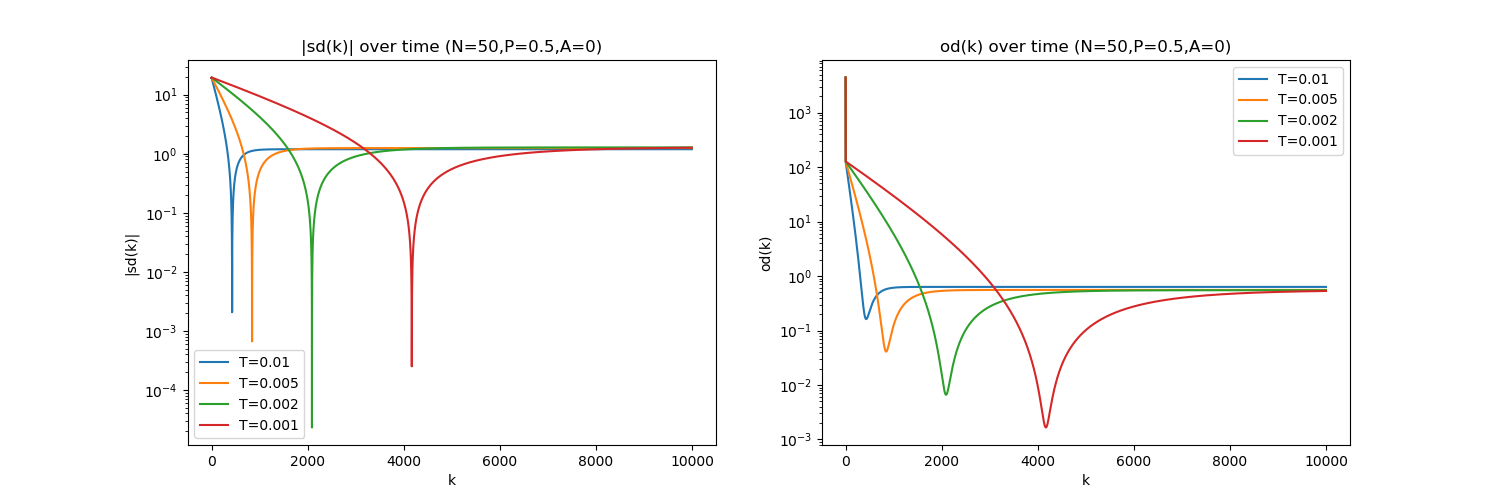

In [85]:
fig,(sold,objd)=plt.subplots(1,2,figsize=(15,5))
N,P,seed=50,0.5,1
sold.set_title('|sd(k)| over time (N={},P={},A={})'.format(N,P,A))
sold.set_xlabel('k')
sold.set_ylabel('|sd(k)|')
sold.set_yscale('log')
for T in Tvals:
    sold.plot(list(map(abs,data['{},{}'.format(N,P)][str(seed)][T]['msoldiff'])),label='T='+str(T))
sold.legend()
objd.set_title('od(k) over time (N={},P={},A={})'.format(N,P,A))
objd.set_xlabel('k')
objd.set_ylabel('od(k)')
objd.set_yscale('log')
for T in Tvals:
    objd.plot(data['{},{}'.format(N,P)][str(seed)][T]['mobjdiff'],label='T='+str(T))
objd.legend()
fig.savefig('tmp.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


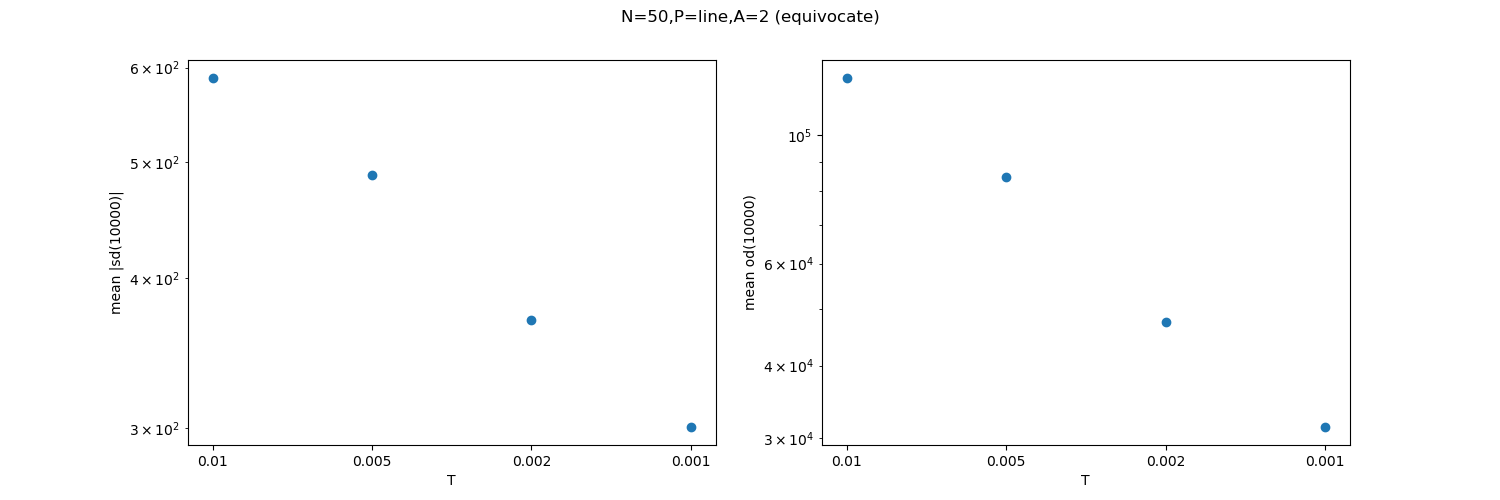

In [168]:
#when P='line'
A,ITER,Tvals,data=readrets('stats_out_A=2.txt')
fig,(msd,mod)=plt.subplots(1,2,figsize=(15,5))
title='N=50,P=line,A={} (equivocate)'.format(A,ITER)#+', equivocating adversary'
fig.suptitle(title)
p='50,line'

msd.set_xlabel('T')
msd.set_ylabel('mean |sd({})|'.format(ITER))
msd.scatter(x=Tvals,y=[np.mean([abs(data[p][seed][T]['msoldiff_fin']) for seed in data[p]]) for T in Tvals])
msd.set_yscale('log')

mod.set_xlabel('T')
mod.set_ylabel('mean od({})'.format(ITER))
mod.scatter(x=Tvals,y=[np.mean([data[p][seed][T]['mobjdiff_fin'] for seed in data[p]]) for T in Tvals])
mod.set_yscale('log')

fig.savefig('tmp.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


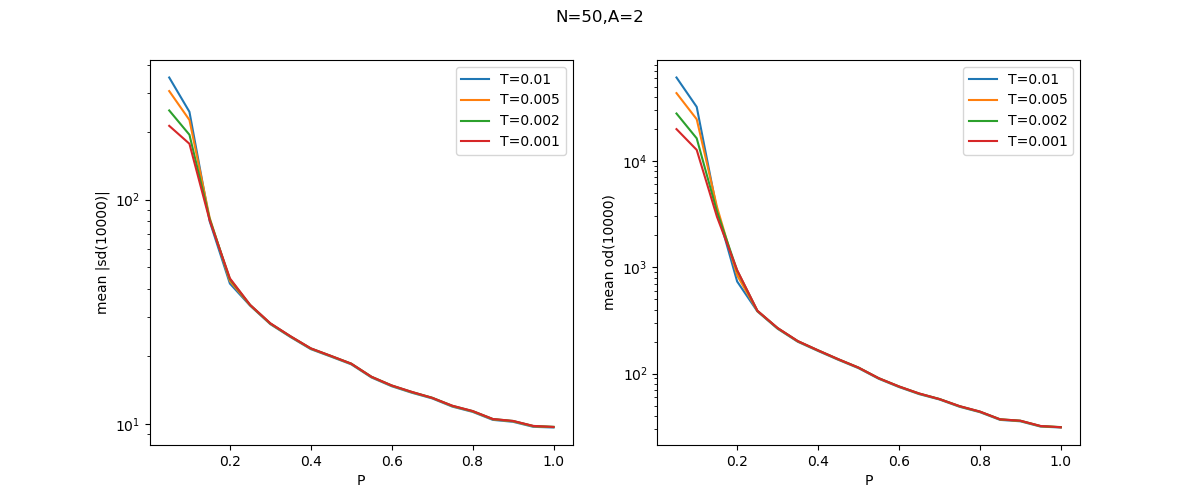

['50,0.05', '50,0.1', '50,0.15', '50,0.2', '50,0.25', '50,0.3', '50,0.35', '50,0.4', '50,0.45', '50,0.5', '50,0.55', '50,0.6', '50,0.65', '50,0.7', '50,0.75', '50,0.8', '50,0.85', '50,0.9', '50,0.95', '50,1.0']


In [171]:
equivocate=False
A,ITER,Tvals,data=readrets('A=2'+('_equivocate' if equivocate else '')+',P=0.05k.txt')
fig,(msd,mod)=plt.subplots(1,2,figsize=(12,5))
title=('N=50,A={}'+(' (equivocate)' if equivocate else '')).format(A)#+', equivocating adversary'
fig.suptitle(title)
params=[p for p in data]
print(params)
pvals=list(map(lambda p:float(p[p.rindex(',')+1:]),params))

msd.set_xlabel('P')
msd.set_ylabel('mean |sd({})|'.format(ITER))
msd.set_yscale('log')
for T in Tvals:
    msd.plot(pvals,
            list(map(lambda p:np.mean([abs(data[p][seed][T]['msoldiff_fin']) for seed in data[p]]),params)),
            label='T='+str(T))
msd.legend()

mod.set_xlabel('P')
mod.set_ylabel('mean od({})'.format(ITER))
mod.set_yscale('log')
for T in Tvals:
    mod.plot(pvals,
            list(map(lambda p:np.mean([data[p][seed][T]['mobjdiff_fin'] for seed in data[p]]),params)),
            label='T='+str(T))
mod.legend()

fig.savefig('tmp.png',bbox_inches='tight')